In [1]:
# Tran Huu Nhan Mssv: 521H0507

# 1. Dataset
## 1.1 Introduction Problem statement
Lung cancer, the leading cause of global cancer deaths, was responsible for 1.59 million fatalities in 2018. While smoking is a major contributor, a recent study in China, published in Nature Medicine, suggests a potential link between air pollution and increased lung cancer risk, particularly in nonsmokers. Further research is required to validate and understand the nuances of this association.
## 1.2 This research
- Predicting the likelihood of a patient developing lung cancer
- Identifying risk factors for lung cancer
## 1.3 Dataset
- Dataset: `Lung Cancer Prediction`
- Source (Kaggle): [dataset link](https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link)

# 2. Data Preprocessing
## 2.1 Read data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cancer patient data sets.csv')
df.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


| Column                     | Description                                           | Type          |
|----------------------------|-------------------------------------------------------|---------------|
| Age                        | The age of the patient.                               | Numeric       |
| Gender                     | The gender of the patient.                            | Categorical   |
| Air Pollution              | The level of air pollution exposure of the patient.   | Categorical   |
| Alcohol use                | The level of alcohol use of the patient.              | Categorical   |
| Dust Allergy               | The level of dust allergy of the patient.             | Categorical   |
| Occupational Hazards       | The level of occupational hazards of the patient.     | Categorical   |
| Genetic Risk               | The level of genetic risk of the patient.             | Categorical   |
| Chronic Lung Disease       | The level of chronic lung disease of the patient.     | Categorical   |
| Balanced Diet              | The level of balanced diet of the patient.            | Categorical   |
| Obesity                    | The level of obesity of the patient.                  | Categorical   |
| Smoking                    | The level of smoking of the patient.                  | Categorical   |
| Passive Smoker             | The level of passive smoker of the patient.          | Categorical   |
| Chest Pain                 | The level of chest pain of the patient.              | Categorical   |
| Coughing of Blood          | The level of coughing of blood of the patient.       | Categorical   |
| Fatigue                    | The level of fatigue of the patient.                 | Categorical   |
| Weight Loss                | The level of weight loss of the patient.             | Categorical   |
| Shortness of Breath         | The level of shortness of breath of the patient.     | Categorical   |
| Wheezing                   | The level of wheezing of the patient.                | Categorical   |
| Swallowing Difficulty      | The level of swallowing difficulty of the patient.   | Categorical   |
| Clubbing of Finger Nails    | The level of clubbing of finger nails of the patient.| Categorical   |


## 2.2 Exploratory Data Analysis

In [4]:
df.shape

(1000, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [6]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.00,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.00,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.00,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.00,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.00,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.00,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.00,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.00,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.00,7.0


In [8]:
df.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [9]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

There are no missing values in the dataset

In [10]:
df.nunique()

index                       1000
Patient Id                  1000
Age                           40
Gender                         2
Air Pollution                  8
Alcohol use                    8
Dust Allergy                   8
OccuPational Hazards           8
Genetic Risk                   7
chronic Lung Disease           7
Balanced Diet                  7
Obesity                        7
Smoking                        8
Passive Smoker                 8
Chest Pain                     9
Coughing of Blood              9
Fatigue                        8
Weight Loss                    8
Shortness of Breath            8
Wheezing                       8
Swallowing Difficulty          8
Clubbing of Finger Nails       9
Frequent Cold                  7
Dry Cough                      7
Snoring                        7
Level                          3
dtype: int64

There are 24 features (exclude `index` and `Patient Id`)
There are 2 Category values in the column `Gender`:
- 0: Male
- 1: Female
There are 3 category values in the column `Level` (target):
- Low, which is low level of lung cancer
- Medium, which is medium level of lung cancer
- High, which is high level of lung cancer

Delete unescessary columns

In [11]:
df.drop(['index', 'Patient Id'], axis=1, inplace=True)
df.shape

(1000, 24)

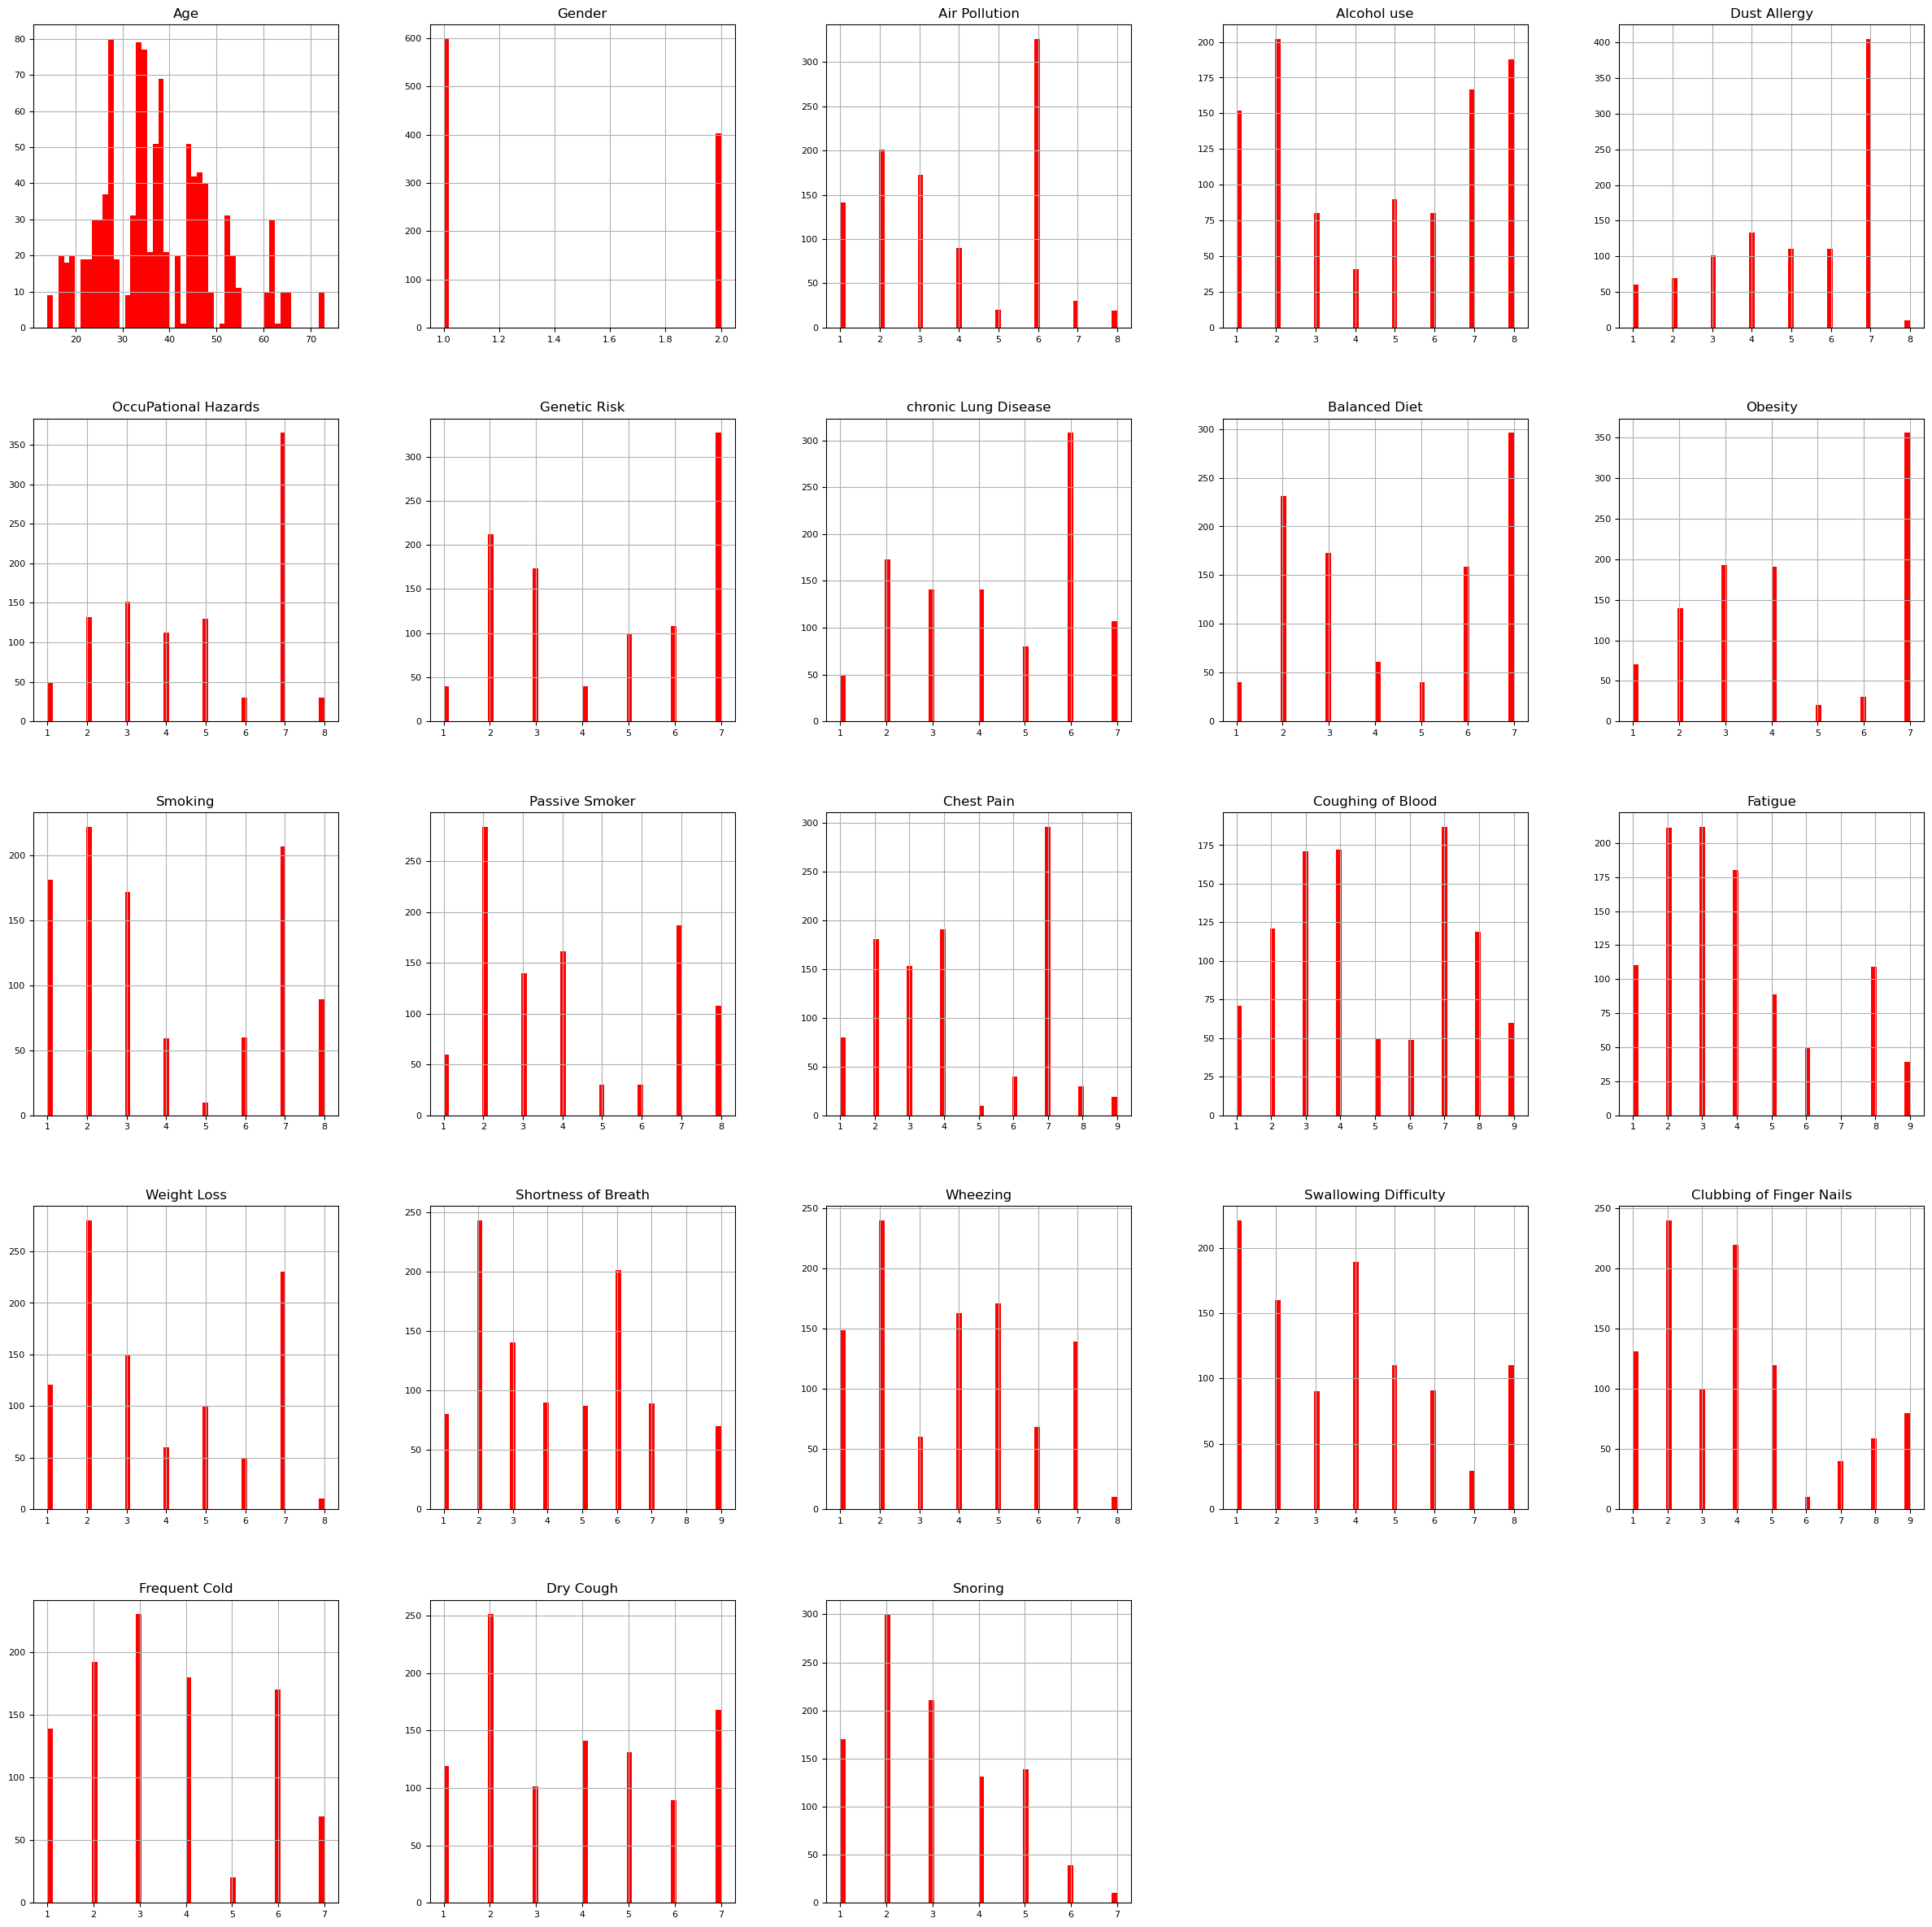

In [12]:
df.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8,  color='red')
plt.show()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


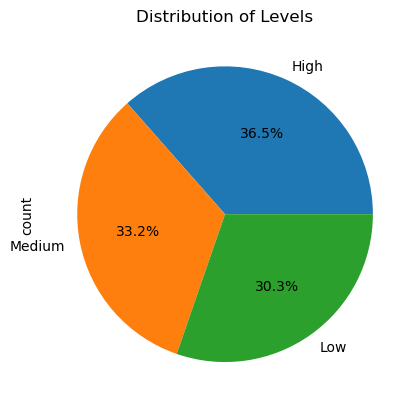

In [13]:
df['Level'].value_counts().plot.pie(autopct='%1.1f%%')
print(df['Level'].value_counts())
plt.title('Distribution of Levels')
plt.show()

radio imbalance = 303/365 =0.83
this is a slightly imbalanced dataset. but it can be effect to the model

Correlation

   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0   33       1              2            4             5   
1   17       1              3            1             5   
2   35       1              4            5             6   
3   37       1              7            7             7   
4   46       1              6            8             7   
5   35       1              4            5             6   
6   52       2              2            4             5   
7   28       2              3            1             4   
8   35       2              4            5             6   
9   46       1              2            3             4   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7    

Text(0.5, 1.0, 'Correlation Map')

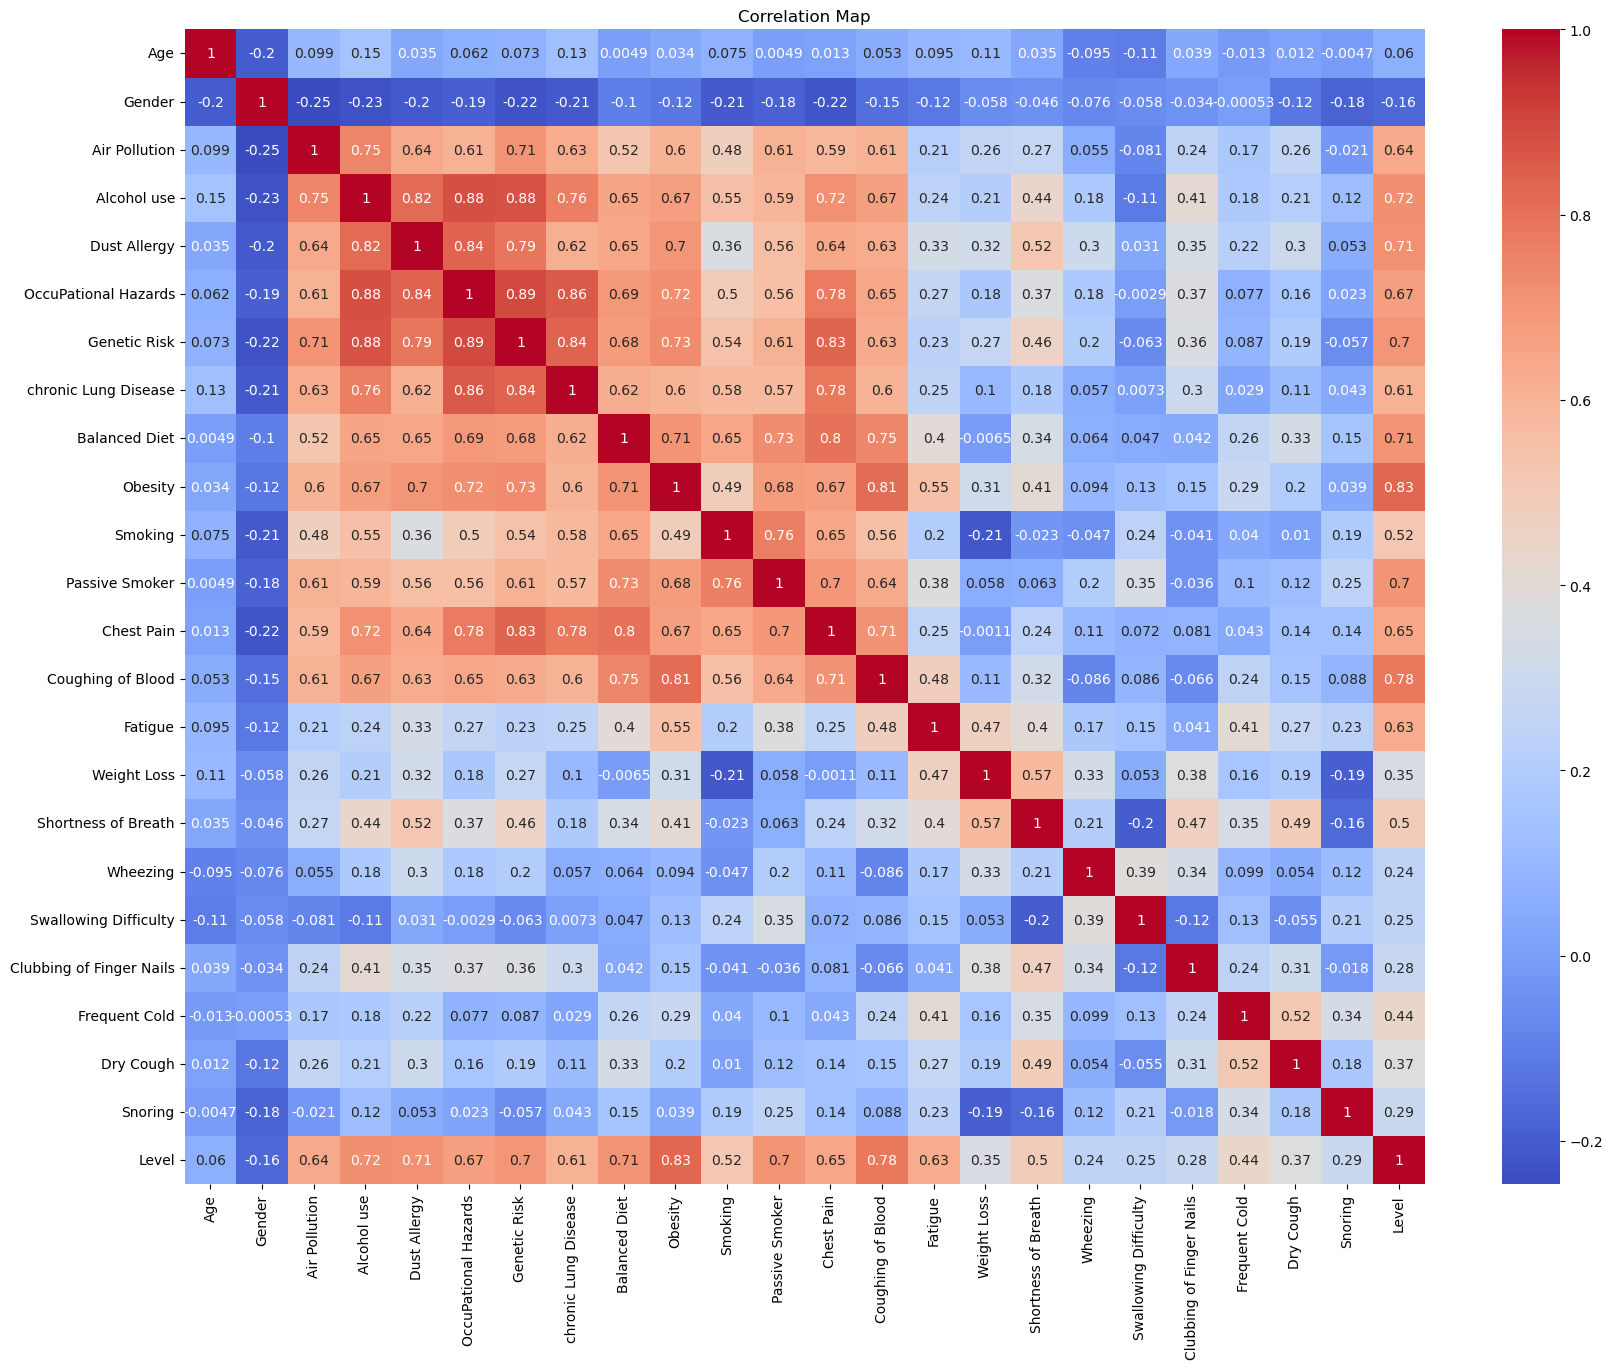

In [14]:
df['Level'] = df['Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
print(df.head(10))
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Map')


there are some features more correlated with Level are:
    - Obesity, balanced diet, passive smoker, alcohol use, occuPational Hazard, smoking
    - passive smokers can be more affected than active smokers because cigarette smoke contains many toxic substances.

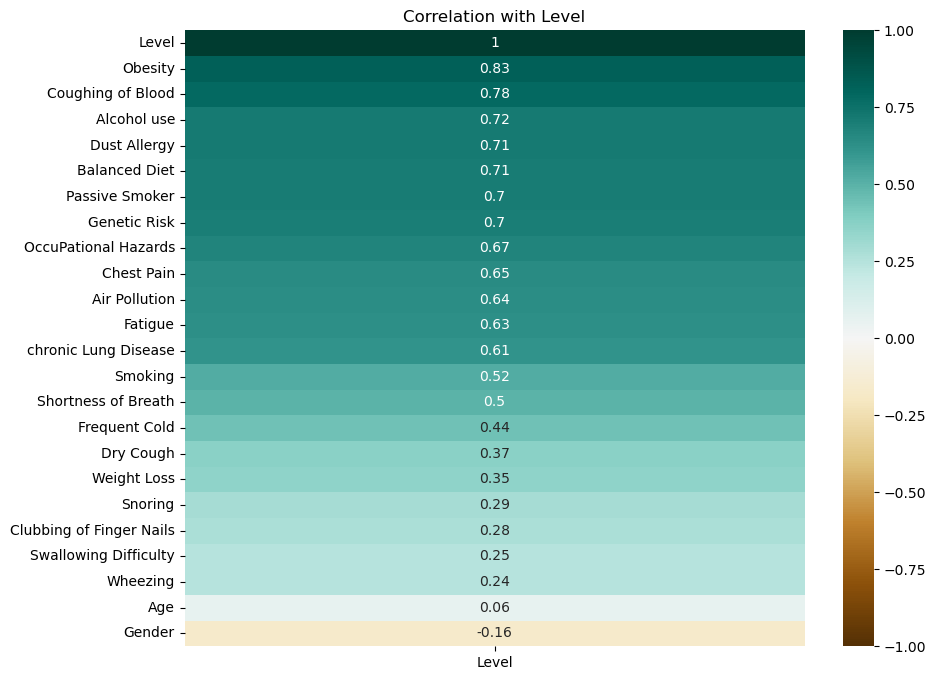

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr()[['Level']].sort_values(by='Level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation with Level')
plt.show()


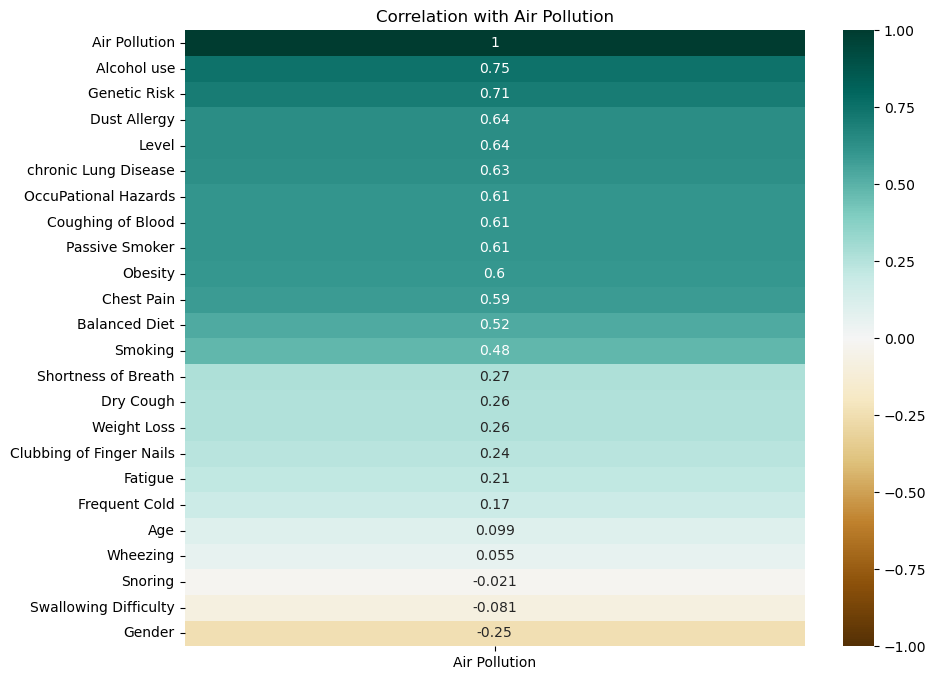

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr()[['Air Pollution']].sort_values(by='Air Pollution', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation with Air Pollution')
plt.show()

Of course, air pollution more relate with genetic risk (0.71) and level.

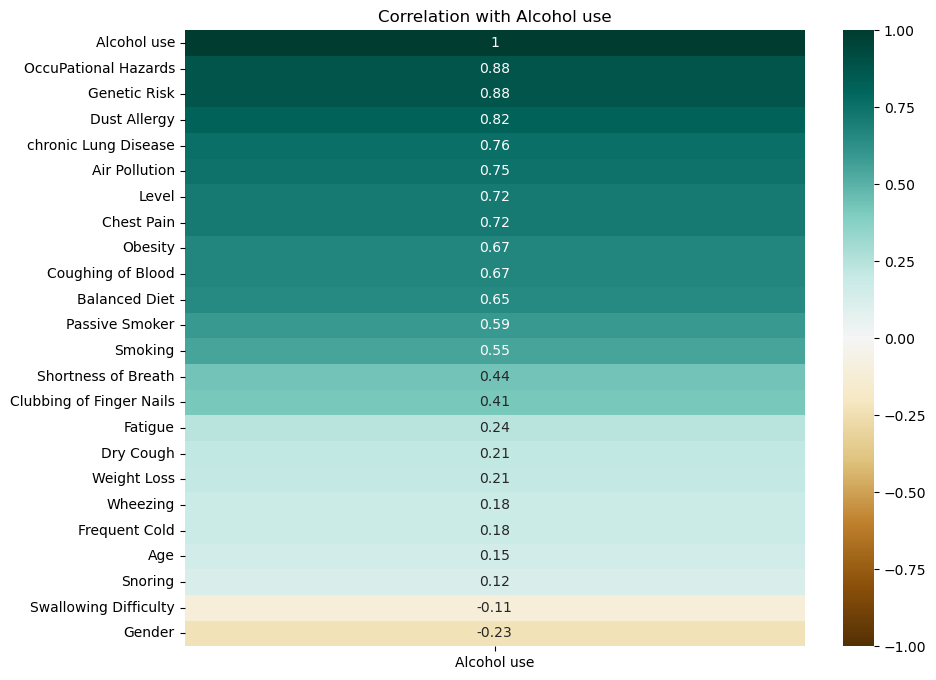

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr()[['Alcohol use']].sort_values(by='Alcohol use', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation with Alcohol use')
plt.show()

OccuPational Hazards and, Genetic risk more effect to alcohol use. but gender is not. may be in this dataset all age can drink alcohol.

## Endcode and Data Normalization

In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Extract features and target variable
X = df.drop('Level', axis=1)  # Features
y = df['Level']  # Target variable

# Standardize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Create a new DataFrame with standardized features and encoded target
df_normalized = pd.DataFrame(X_scaled, columns=X.columns)
df_normalized['Level'] = y_encoded

print(df_normalized.head())


        Age    Gender  Air Pollution  Alcohol use  Dust Allergy  \
0 -0.347848 -0.819903      -0.906679    -0.214954     -0.083340   
1 -1.681238 -0.819903      -0.413919    -1.360357     -0.083340   
2 -0.181174 -0.819903       0.078842     0.166847      0.421751   
3 -0.014501 -0.819903       1.557123     0.930449      0.926842   
4  0.735531 -0.819903       1.064362     1.312250      0.926842   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0             -0.398718     -0.743202             -1.288162      -1.167040   
1             -0.873383     -0.272821             -1.288162      -1.167040   
2              0.075946      0.197560             -0.205673       0.706970   
3              1.025275      0.667941              1.418061       1.175473   
4              1.025275      1.138323              0.876816       1.175473   

    Obesity  ...   Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0 -0.218941  ... -0.381548     0.065746            -0.

# 2. Build machine learning model
## 2.1 Basic model

In [19]:
# Supervised learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Ensemble learning methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [21]:

# init model KNN
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f'KNN Accuracy: {knn_accuracy}')

# init Decision Tree
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f'Decision Tree Accuracy: {dt_accuracy}')

# init model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f'Naive Bayes Accuracy: {nb_accuracy}')

KNN Accuracy: 1.0
Decision Tree Accuracy: 0.995
Naive Bayes Accuracy: 0.895


In [22]:
# Ensemble Learning
# Random Forest 
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy}')

# AdaBoost
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)
print(f'AdaBoost Accuracy: {ada_accuracy}')

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f'Gradient Boosting Accuracy: {gb_accuracy}')

Random Forest Accuracy: 1.0
AdaBoost Accuracy: 0.725
Gradient Boosting Accuracy: 1.0


# Which is better

KNN Accuracy: 1.0
Decision Tree Accuracy: 0.995
Naive Bayes Accuracy: 0.895
Random Forest Accuracy: 1.0
AdaBoost Accuracy: 0.725
Gradient Boosting Accuracy: 1.0


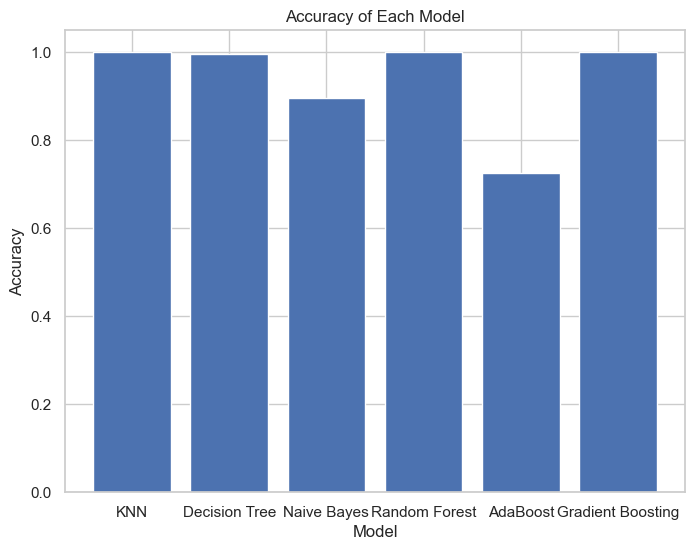

KNN Recall: 1.0
Decision Tree Recall: 0.995
Naive Bayes Recall: 0.895
Random Forest Recall: 1.0
AdaBoost Recall: 0.725
Gradient Boosting Recall: 1.0


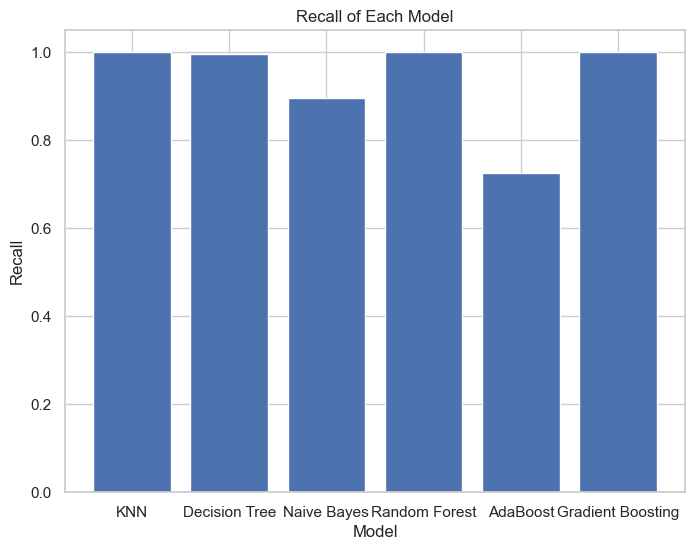

In [698]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate accuracy scores for each model
knn_accuracy = accuracy_score(y_test, knn_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
ada_accuracy = accuracy_score(y_test, ada_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)

# Print the accuracy scores
print(f'KNN Accuracy: {knn_accuracy}')
print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'Naive Bayes Accuracy: {nb_accuracy}')
print(f'Random Forest Accuracy: {rf_accuracy}')
print(f'AdaBoost Accuracy: {ada_accuracy}')
print(f'Gradient Boosting Accuracy: {gb_accuracy}')
import matplotlib.pyplot as plt

# Define the model names and accuracy values
model_names = ['KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
accuracy_values = [knn_accuracy, dt_accuracy, nb_accuracy, rf_accuracy, ada_accuracy, gb_accuracy]

# Plot the accuracy values
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_values)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Model')
plt.show()

# Calculate recall scores for each model
knn_recall = recall_score(y_test, knn_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
nb_recall = recall_score(y_test, nb_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
ada_recall = recall_score(y_test, ada_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')

# Print the recall scores
print(f'KNN Recall: {knn_recall}')
print(f'Decision Tree Recall: {dt_recall}')
print(f'Naive Bayes Recall: {nb_recall}')
print(f'Random Forest Recall: {rf_recall}')
print(f'AdaBoost Recall: {ada_recall}')
print(f'Gradient Boosting Recall: {gb_recall}')

# Define the model names and recall values
model_names = ['KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
recall_values = [knn_recall, dt_recall, nb_recall, rf_recall, ada_recall, gb_recall]

# Plot the recall values
plt.figure(figsize=(8, 6))
plt.bar(model_names, recall_values)
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall of Each Model')
plt.show()



some model maybe overfitting because dataset to small. we will tunning it.

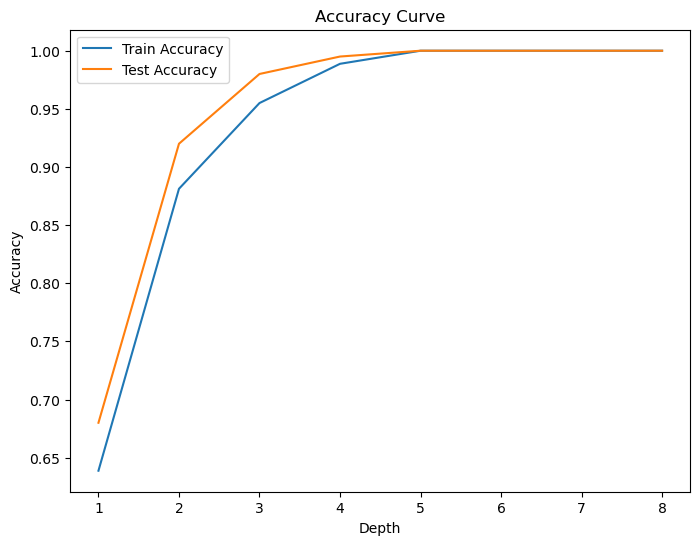

In [24]:
# Tunning model
# decision Tree
train_accuracies = []
test_accuracies = []
depths = []

# deep from 1 to 8
for depth in range(1, 8 + 1):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    y_train_pred = dt.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_test_pred = dt.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

    depths.append(depth)

plt.figure(figsize=(8, 6))
plt.plot(depths, train_accuracies, label='Train Accuracy')
plt.plot(depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

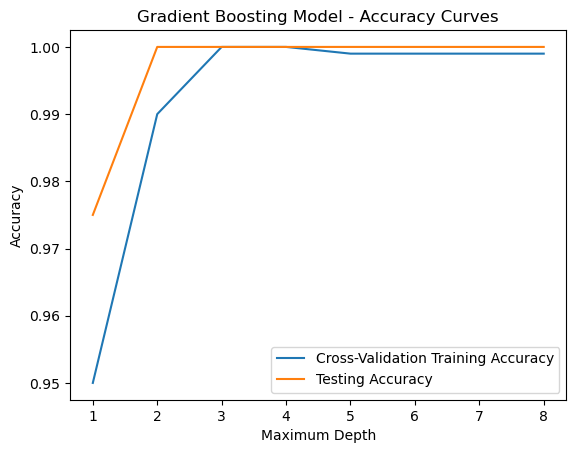

In [25]:
from sklearn.model_selection import cross_val_score
# Vary the maximum depth from 1 to 8
depths = range(1, 9)
train_accuracies = []
test_accuracies = []

for depth in depths:
    gb_model = GradientBoostingClassifier(max_depth=depth, learning_rate=0.1, n_estimators=10)
    
    # Perform cross-validation
    cv_scores = cross_val_score(gb_model, X_scaled, y_encoded, cv=5)
    
    # Calculate mean accuracy across cross-validation folds
    train_accuracy = cv_scores.mean()
    train_accuracies.append(train_accuracy)
    
    # Calculate testing accuracy
    gb_model.fit(X_train, y_train)
    test_pred = gb_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

# Plot the accuracy curves
plt.plot(depths, train_accuracies, label='Cross-Validation Training Accuracy')
plt.plot(depths, test_accuracies, label='Testing Accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Model - Accuracy Curves')
plt.legend()
plt.show()


model has max accuracy when max deep = 3, but in all time.

## FFNN and RNN model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Create the FFNN model
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Add additional hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=32)


Epoch 1/40
25/25 [==============================] - 1s 3ms/step - loss: 0.9597 - accuracy: 0.5738
Epoch 2/40
25/25 [==============================] - 0s 3ms/step - loss: 0.6406 - accuracy: 0.7788
Epoch 3/40
25/25 [==============================] - 0s 3ms/step - loss: 0.4289 - accuracy: 0.8863
Epoch 4/40
25/25 [==============================] - 0s 3ms/step - loss: 0.2643 - accuracy: 0.9388
Epoch 5/40
25/25 [==============================] - 0s 3ms/step - loss: 0.1564 - accuracy: 0.9638
Epoch 6/40
25/25 [==============================] - 0s 3ms/step - loss: 0.1100 - accuracy: 0.9762
Epoch 7/40
25/25 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9775
Epoch 8/40
25/25 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9875
Epoch 9/40
25/25 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9912
Epoch 10/40
25/25 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9912
Epoch 11/40
25/25 [

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Create the RNN model
model = Sequential()

# Add the RNN layer
model.add(SimpleRNN(units=64, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add additional layers
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model

model.fit(X_train, y_train, epochs=10, batch_size=32)





Epoch 1/10


25/25 [==============================] - 2s 6ms/step - loss: 1.0062 - accuracy: 0.5150
Epoch 2/10
25/25 [==============================] - 0s 6ms/step - loss: 0.7415 - accuracy: 0.7000
Epoch 3/10
25/25 [==============================] - 0s 6ms/step - loss: 0.3427 - accuracy: 0.8712
Epoch 4/10
25/25 [==============================] - 0s 6ms/step - loss: 0.2018 - accuracy: 0.9250
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: 0.1594 - accuracy: 0.9362
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 0.1075 - accuracy: 0.9675
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0803 - accuracy: 0.9787
Epoch 8/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0615 - accuracy: 0.9787
Epoch 9/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0326 - accuracy: 0.9937
Epoch 10/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0229 - accuracy: 0.9950


In [31]:
from tensorflow.keras.callbacks import EarlyStopping

# Create the RNN model
model = Sequential()

# Add the RNN layer
model.add(SimpleRNN(units=64, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add additional layers
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

model.fit(X_train, y_train, epochs=7, batch_size=32, callbacks=[early_stopping])

# Save the model
model.save('my_model_rnn.keras')


Epoch 1/7
25/25 [==============================] - 2s 5ms/step - loss: 1.0332 - accuracy: 0.4700
Epoch 2/7
25/25 [==============================] - 0s 6ms/step - loss: 0.7087 - accuracy: 0.6812
Epoch 3/7
25/25 [==============================] - 0s 7ms/step - loss: 0.4510 - accuracy: 0.7650
Epoch 4/7
25/25 [==============================] - 0s 6ms/step - loss: 0.2726 - accuracy: 0.8850
Epoch 5/7
25/25 [==============================] - 0s 6ms/step - loss: 0.2299 - accuracy: 0.9087
Epoch 6/7
25/25 [==============================] - 0s 5ms/step - loss: 0.1965 - accuracy: 0.9312
Epoch 7/7
25/25 [==============================] - 0s 5ms/step - loss: 0.1337 - accuracy: 0.9525


In [32]:
# Ffnn 

# Define the model architecture
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=7, batch_size=32)

# Save the model
model.save('my_model_ffnn.keras')


Epoch 1/7
25/25 [==============================] - 1s 2ms/step - loss: 0.8723 - accuracy: 0.7125
Epoch 2/7
25/25 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.8537
Epoch 3/7
25/25 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.9250
Epoch 4/7
25/25 [==============================] - 0s 3ms/step - loss: 0.2955 - accuracy: 0.9625
Epoch 5/7
25/25 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.9725
Epoch 6/7
25/25 [==============================] - 0s 3ms/step - loss: 0.1505 - accuracy: 0.9725
Epoch 7/7
25/25 [==============================] - 0s 3ms/step - loss: 0.1142 - accuracy: 0.9737


In [33]:
# Using the model
from tensorflow.keras.models import load_model

# Load the model from the file
model = load_model('my_model_ffnn.keras')

# Now you can use the model to make predictions
xx = X_train[0:1]
yy = y_train[0:1]
print(xx)
print(yy)
predictions = model.predict(xx)
print(predictions)


[[-0.76453259  1.21965659 -1.39943934  0.54864791  0.92684156  0.07594632
  -0.74320237 -1.28816247  0.70697042 -1.16062345 -0.3800127  -0.51717671
  -1.069735   -1.17811854 -0.38154776 -0.38767737  1.20843596  1.5792056
   0.11193138  1.7081063   1.89125801  1.54417079  1.40710485]]
[1]
1/1 [==============================] - 0s 81ms/step
[[0.01029004 0.977831   0.01187894]]


# Recommendation and advice
- Understanding the data.
- Check size of dataset.
- Test in many model.
- Evaluation model in many view.